In [81]:
# Import necessary libraries
import pandas as pd  # Data manipulation
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.ensemble import RandomForestClassifier # Initialize the Random Forest model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Evaluate model performance using accuracy Model evaluation
from sklearn.inspection import permutation_importance

In [58]:
# Load the Iris dataset
df = pd.read_csv('IRIS.csv')

## **Exploratoty Data Analysis**

In [59]:
# Display basic information
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
# check the summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Insights**
we have here a data set with 150 observations of 3 species of Iris </br>
flower (setosa,virginica and versicolor)</br>
observed on four covariates, the sepal and petal length and width.</br>
in this summary we see the mean of each observed covariates (sl: 5.84, sw:3.05, pl:3.75, pw:1.2) </br>
by the standar deviation we can say that the covariate with much variance in the</br> values is the petal_length with std = 1.76 and the covariate </br>with less variance is the sepal_with with std = 0.4 </br>

In [61]:
# type information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


/tmp/ipykernel_55034/283284621.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x="species",palette={'Iris-setosa': 'blue', 'Iris-versicolor': 'orange','Iris-virginica': 'green'})


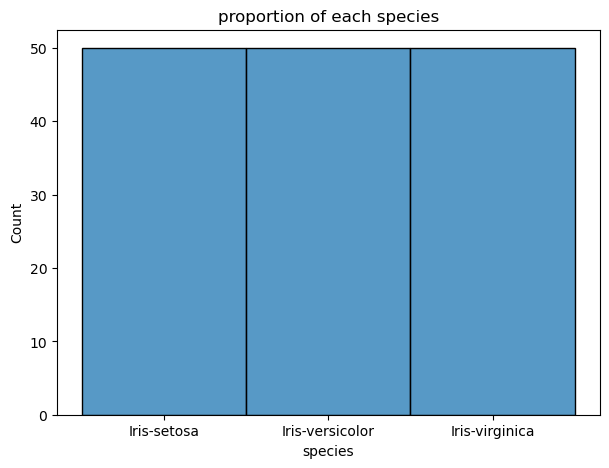

In [63]:
# proportion of each species in the dataset
plt.figure(figsize=(7,5))
sns.histplot(data=df,x="species",palette={'Iris-setosa': 'blue', 'Iris-versicolor': 'orange','Iris-virginica': 'green'})
plt.title("proportion of each species")
plt.show()

### **Insigth**
Here we can see that the species are equaly represented in the dataset so the data are not imbalance.

/tmp/ipykernel_55034/2545745143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y='sepal_length',palette={'Iris-setosa': 'blue', 'Iris-versicolor': 'orange','Iris-virginica': 'green'})


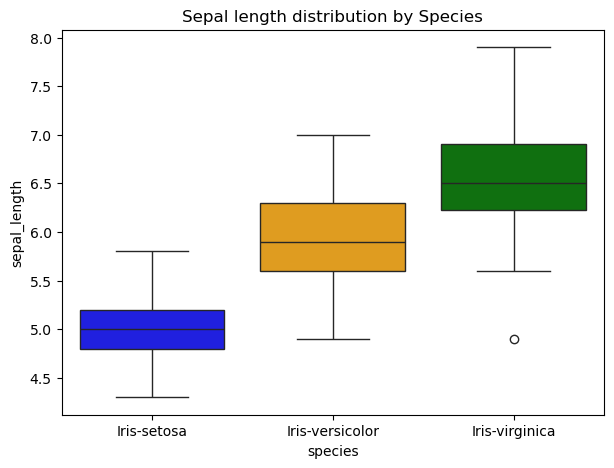

In [64]:
# Boxplot to analyze distribution
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='species', y='sepal_length',palette={'Iris-setosa': 'blue', 'Iris-versicolor': 'orange','Iris-virginica': 'green'})
plt.title('Sepal length distribution by Species')
plt.show()

### **Insights**
Here we can see that the distrinution of the scpecies </br>
in terms of sepal_length are centerarround the mean value. </br>
Also we can see that the sepal_length in each species are not the same </br>
with a the the value of sepal_length of versicolor in average gretter </br>
than the setosa one and less in average than the virginica one.  

<Figure size 700x500 with 0 Axes>

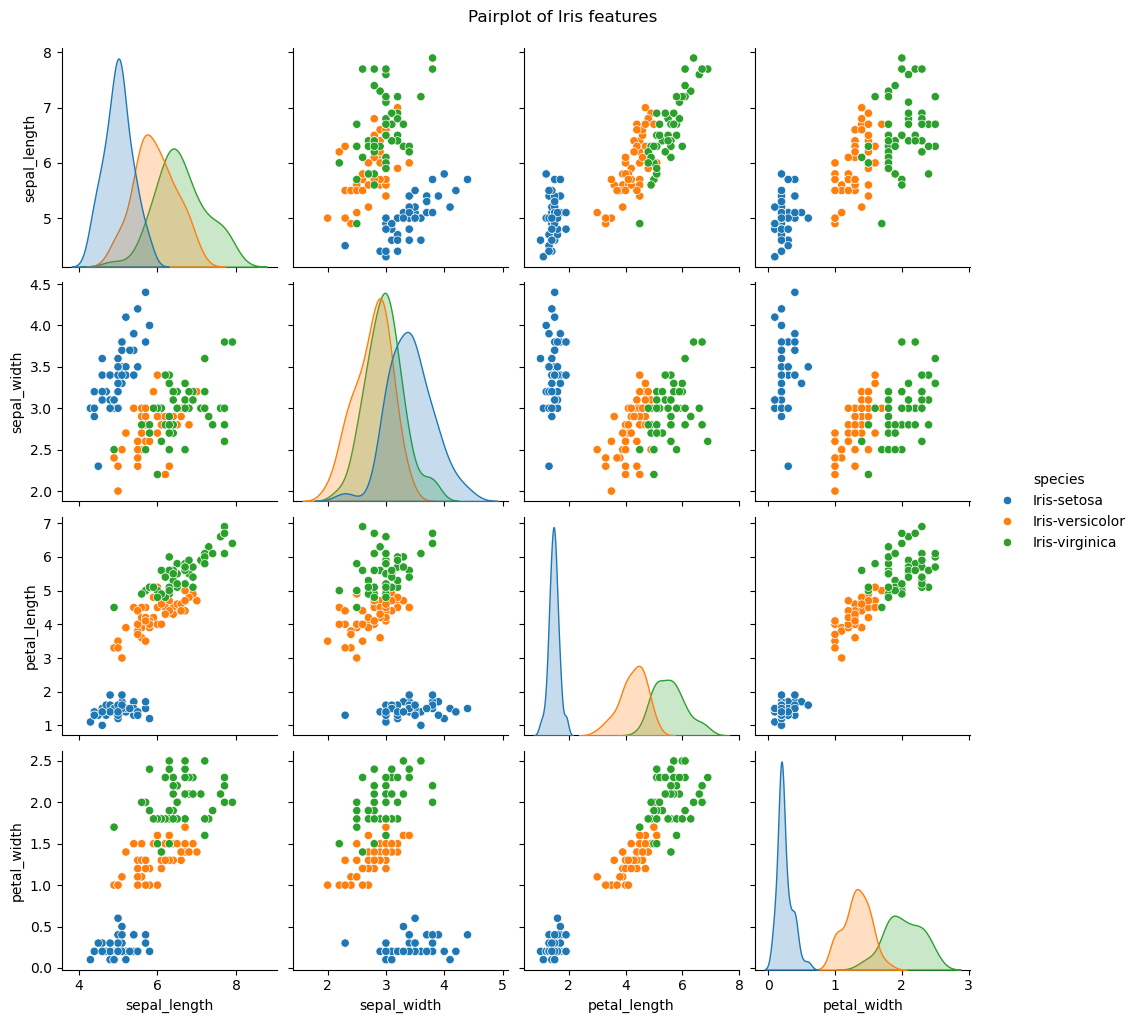

In [65]:
# Data visualization
plt.figure(figsize=(7, 5))
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Iris features', y=1.02)
plt.show()

### **Insights**
In this figure we can see the different relations betwen the covariate</br>
where there is a positive correlation between the petal_length and the petal_with,</br> the sepal_legnth and the petal_width and the petal_length and the sepal_length. </br>
since the increase of one of them is follow by the increase nthe other values </br>
we can also say that the petal length and the the petal width are good covariates </b>
to distinguish the setosa species from the other.

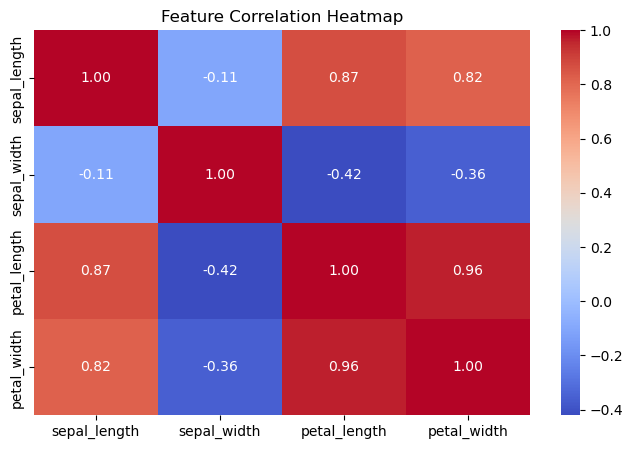

In [66]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


### **Insigths**
This corelation matrix come to confirm us our interpretation of the plots in the pair plot</br>
here we can see the highly positive correlation between sepal_length,petal_length and petal_width </br>
and the negative correlation betwen sepal_width and the three other covariates. 

## **Classification part**

In [67]:
# Preparing data for model training

# remove the target column on the data that we want to train our model on.
X = df.drop(columns=['species'])  
# keep the target aside for the prediction 
y = df['species']  

In [68]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Split dataset into training and testing sets

In [69]:
print(f"Dimension of the train set: {X_train.shape}")
print(f"Dimension of the test set: {X_test.shape}")

Dimension of the train set: (120, 4)
Dimension of the test set: (30, 4)


In [70]:
# look at some observation before standardise 
X_train.head(5)

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


In [71]:
# Standardizing the data to keep the values of each covariate in a same range to avoid 
# the model to 
scaler = StandardScaler() # Standardize the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# look at some observation after standardisation 
X_train[0:5]

array([[-1.72156775, -0.32483982, -1.34703555, -1.32016847],
       [-1.12449223, -1.22612948,  0.41429037,  0.65186742],
       [ 1.14439475, -0.55016223,  0.58474127,  0.25746024],
       [-1.12449223,  0.12580502, -1.29021859, -1.45163753],
       [-0.40800161, -1.22612948,  0.13020555,  0.12599118]])

## **Recall**
we want to epmhase the fact that wheter random forest classifier are scale invarant </br>
it is always a good practice to standardasie the data in the same range of values. 

In [73]:
# Model training using a random forest model "RandomForestClassifier"
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)# Evaluate model performance using accuracy

In [75]:
print(f'\nModel Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))



Model Accuracy: 0.90

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



## **Interpratation**
The model get an accuracy of 90% with a high precision (100%) in the setosa species.
:</br>
- Iris-setosa (Perfect Classification)</br>
- Iris-versicolor (Good Performance, Slightly Lower Precision)</br>
- Iris-virginica (Lower Recall)</br>

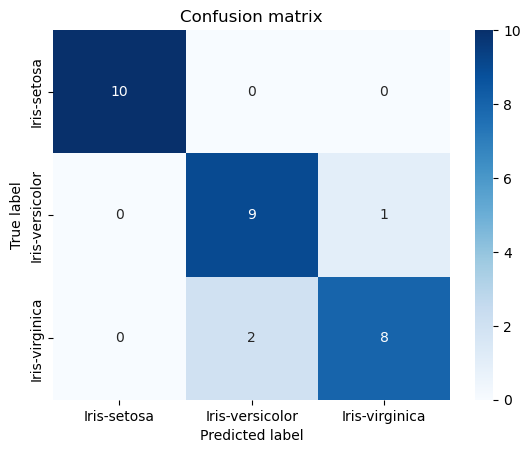

In [78]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
# Labels
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.show()

### **Insigths**
Here we can see that the model classsify verry well the setosa class with 100% well classify on the 10 examples in the test
But also the model strugle a little bit with the two other classes. 

/tmp/ipykernel_55034/311918143.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


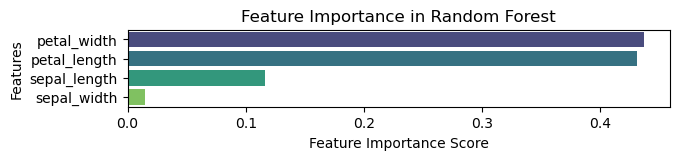

In [92]:
## Assess for the important covariates in our model

# Get feature importance scores
feature_importances = model.feature_importances_
# construct a dataframe for a later visualisation
feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns=['species']).columns,
    'Importance': feature_importances
})
# Sort features by importance (highest to lowest)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(7, 1))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

### **Insigth**
As we said earlier the most important feature for the model to well caracterise each class 
are the petal_width and the petal_length.